# Download the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
data=pd.read_csv("C:/Users/dheep/downloads/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualisations

In [6]:
data.duplicated().sum()

0

<AxesSubplot:xlabel='Age'>

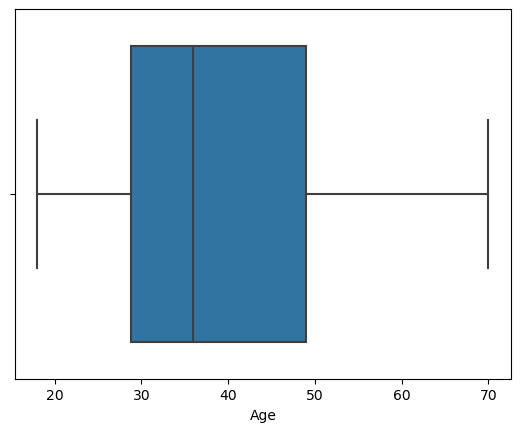

In [7]:
sns.boxplot(x="Age",data=data)

<AxesSubplot:xlabel='Annual Income (k$)'>

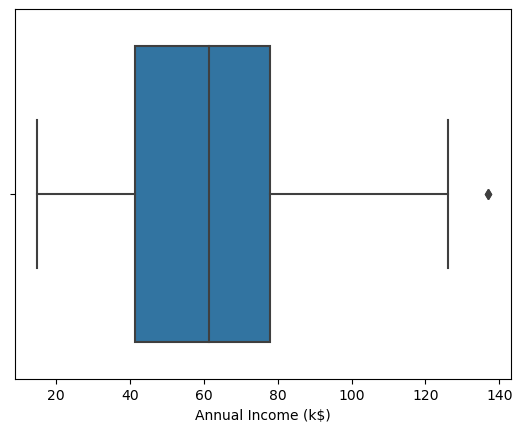

In [8]:
sns.boxplot(x="Annual Income (k$)",data=data)

<AxesSubplot:xlabel='Spending Score (1-100)'>

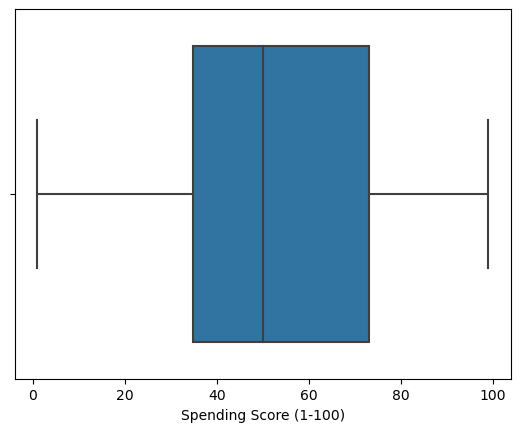

In [9]:
sns.boxplot(x="Spending Score (1-100)",data=data)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

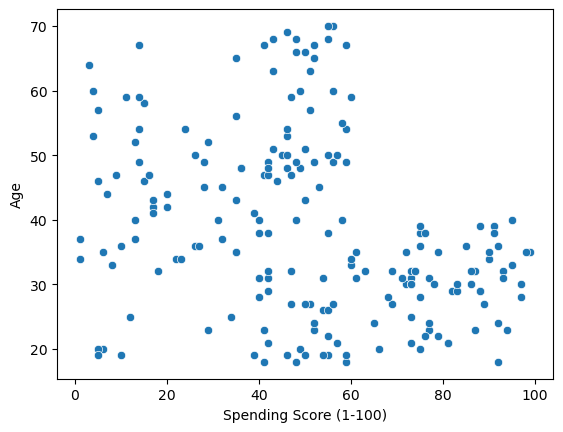

In [11]:
sns.scatterplot(y="Age",x="Spending Score (1-100)",data=data)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

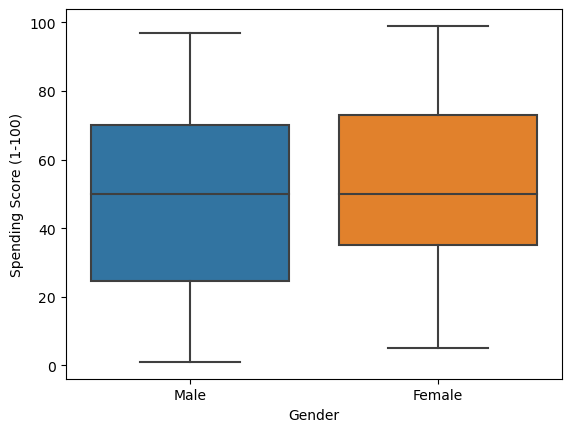

In [12]:
sns.boxplot(y="Spending Score (1-100)",data=data,x="Gender")


# Descriptive statistics

In [13]:
data1=data.drop(columns="CustomerID")
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
data1["Gender"].replace({"Male":1,"Female":0},inplace=True)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


C:\Users\dheep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


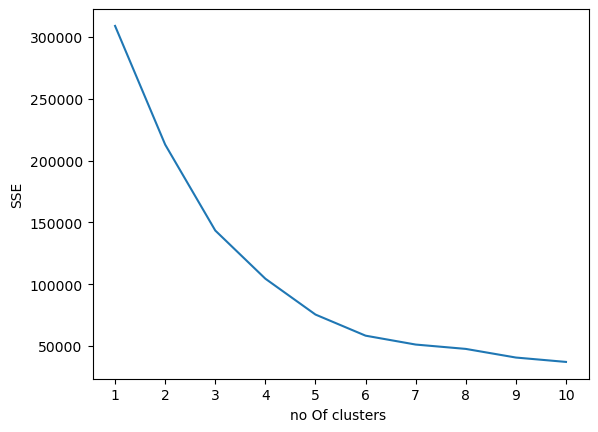

In [16]:
from sklearn.cluster import KMeans
sse=[]
for i in range(1,11):
    kms=KMeans(n_clusters=i)
    kms.fit(data1)
    sse.append(kms.inertia_)
    
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("no Of clusters ")
plt.ylabel("SSE")
plt.show()

In [17]:
kms=KMeans(n_clusters=5)
kms.fit(data1)
labels=kms.predict(data1)
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [18]:
centroids=kms.cluster_centers_[:,[2,3]]

In [19]:
centroids

array([[26.30434783, 78.56521739],
       [87.75      , 17.58333333],
       [86.53846154, 82.12820513],
       [55.29113924, 49.56962025],
       [26.30434783, 20.91304348]])

In [20]:
kms.cluster_centers_

array([[ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])

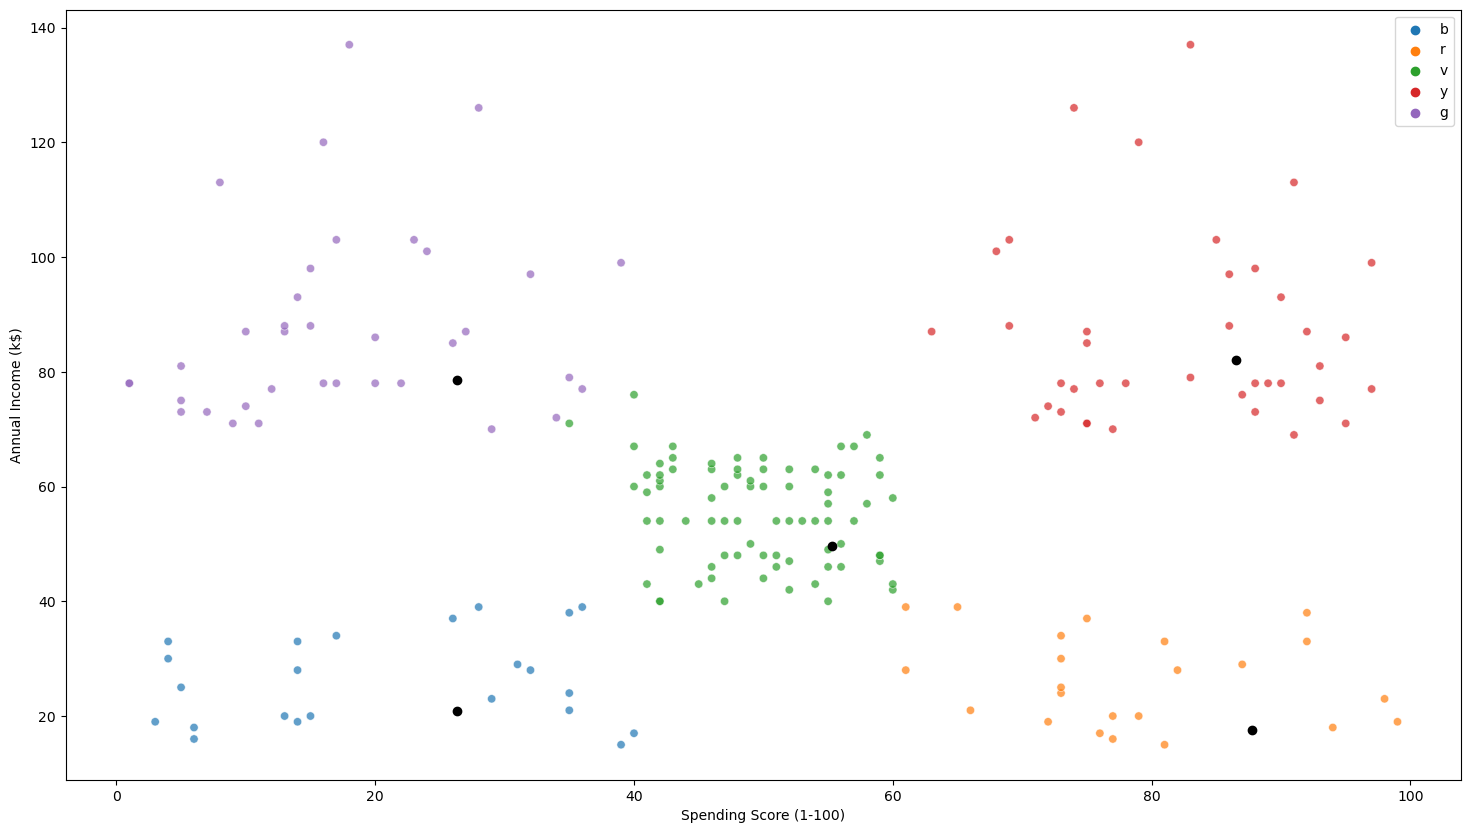

In [21]:
colormap={1:"r",2:"g",3:"y",4:"v",5:"b"}
colors=list(map(lambda x:colormap[x+1],labels))
plt.figure(figsize=(18,10))
sns.scatterplot(x="Spending Score (1-100)",y="Annual Income (k$)",data=data,marker="o",hue=colors,alpha=0.7,edgecolors="k")
for i,centroid in enumerate(centroids):
    plt.scatter(*centroid,c="k")
plt.show()